<a href="https://colab.research.google.com/github/Ganesh-Kdt/Assignment-2-NN/blob/neural_network_part2/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load the dataset through drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/dataset.csv')
df.head()
print(df.shape)

Mounted at /content/drive
(766, 8)


In [2]:
#main statistics related to our dataset
df.info()
df=df.apply(pd.to_numeric,errors='coerce')
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 766 entries, 0 to 765
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f1      766 non-null    object
 1   f2      766 non-null    object
 2   f3      766 non-null    int64 
 3   f4      766 non-null    object
 4   f5      766 non-null    object
 5   f6      766 non-null    object
 6   f7      766 non-null    object
 7   target  766 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 48.0+ KB


,f1,f2,f3,f4,f5,f6,f7,target
count,765.000000,765.000000,766.000000,765.000000,765.000000,765.000000,765.000000,766.000000
mean,3.849673,120.909804,69.118799,20.542484,80.091503,31.998170,0.472128,0.349869
std,3.373696,31.947945,19.376901,15.960515,115.374383,7.898275,0.331545,0.477240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,0.000000
25%,1.000000,99.000000,62.500000,0.000000,0.000000,27.300000,0.244000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,36.000000,32.000000,0.374000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,128.000000,36.600000,0.626000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,1.000000


In [3]:
#converting NA values into median
for column in df.columns:
    unique_values = df[column].unique()
    for column_value in unique_values:
        if not isinstance(column_value, (int, float)):
            print(f"Invalid value '{column_value}' in column '{column}'")

for column in df.columns:
    if df[column].isna().any():
          df[column] = df[column].fillna(df[column].median())

Invalid value '72' in column 'f3'
Invalid value '66' in column 'f3'
Invalid value '64' in column 'f3'
Invalid value '40' in column 'f3'
Invalid value '74' in column 'f3'
Invalid value '50' in column 'f3'
Invalid value '0' in column 'f3'
Invalid value '70' in column 'f3'
Invalid value '96' in column 'f3'
Invalid value '92' in column 'f3'
Invalid value '80' in column 'f3'
Invalid value '60' in column 'f3'
Invalid value '84' in column 'f3'
Invalid value '30' in column 'f3'
Invalid value '88' in column 'f3'
Invalid value '90' in column 'f3'
Invalid value '94' in column 'f3'
Invalid value '76' in column 'f3'
Invalid value '82' in column 'f3'
Invalid value '75' in column 'f3'
Invalid value '58' in column 'f3'
Invalid value '78' in column 'f3'
Invalid value '68' in column 'f3'
Invalid value '110' in column 'f3'
Invalid value '56' in column 'f3'
Invalid value '62' in column 'f3'
Invalid value '85' in column 'f3'
Invalid value '86' in column 'f3'
Invalid value '48' in column 'f3'
Invalid value 

In [4]:
columns=['f1','f2','f3','f4','f5','f6','f7']
# def impute_outlier(df, column):
#     impute_column = df[column]
#     q1 = df[column].quantile(0.25)
#     q3 = df[column].quantile(0.75)
#     iqr = q3 - q1

#     lower_bound = q1 - 1.5 * iqr
#     upper_bound = q3 + 1.5 * iqr

#     non_outlier_median = impute_column[(df[column] >= lower_bound) & (df[column] <= upper_bound)].median()

#     def impute_value(value):
#         if value < lower_bound or value > upper_bound:
#             return non_outlier_median
#         else:
#             return value

#     df[column] = df[column].apply(impute_value)

# for column in columns:
#     impute_outlier(df, column)

# def normalize(df,column):
#     column_min = df[column].min()
#     column_max = df[column].max()
#     print("Minimum value for ",column," is: ",column_min)
#     print("Maximum value for ",column," is: ",column_max)
#     df[column] = (df[column] - column_min) / (column_max - column_min)

# for column in columns:
#     normalize(df,column)

# df.head(100)

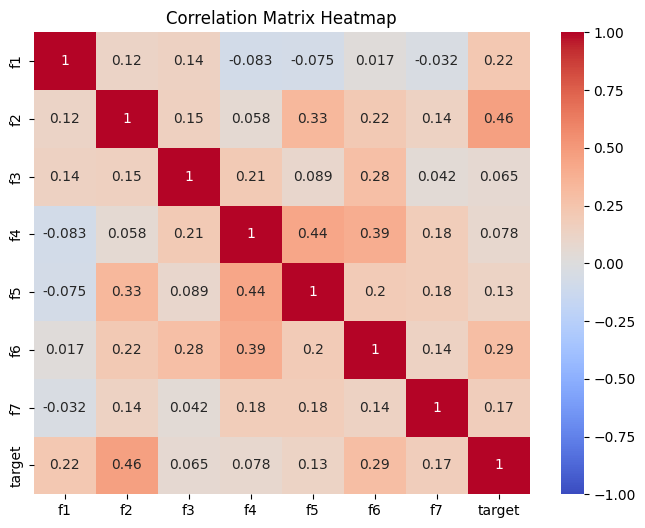

In [5]:
corr_matrix = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [6]:
pip install imbalanced-learn

In [7]:
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

#Scaling the dataset
X = df.drop(columns=['target','f3','f4','f5'])
y = df['target']
print(df['target'].value_counts())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Splitting the dataset into 70% training, 15% validation, 15% testing
X_temp, X_test, Y_temp, Y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.20, random_state=42, stratify=Y_temp)

smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_train_resampled.values, dtype=torch.float32)

X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(Y_val.values, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
Y_test_tensor = torch.tensor(Y_test.values, dtype=torch.float32)

print("Training shape:", X_train_tensor.shape, Y_train_tensor.shape)
print("Validation shape:", X_val_tensor.shape, Y_val_tensor.shape)
print("Test shape:", X_test_tensor.shape, Y_test_tensor.shape)



target
0    498
1    268
Name: count, dtype: int64
Training shape: torch.Size([676, 4]) torch.Size([676])
Validation shape: torch.Size([131, 4]) torch.Size([131])
Test shape: torch.Size([115, 4]) torch.Size([115])


Validation loss improved from inf to 1.3561. Saving model...
Epoch [1/40], Training Loss: 0.6813, Validation Loss: 0.6780
Validation loss improved from 1.3561 to 1.2883. Saving model...
Epoch [2/40], Training Loss: 0.6602, Validation Loss: 0.6441
Validation loss improved from 1.2883 to 1.2441. Saving model...
Epoch [3/40], Training Loss: 0.6254, Validation Loss: 0.6221
Validation loss improved from 1.2441 to 1.1952. Saving model...
Epoch [4/40], Training Loss: 0.6012, Validation Loss: 0.5976
Validation loss improved from 1.1952 to 1.1641. Saving model...
Epoch [5/40], Training Loss: 0.5834, Validation Loss: 0.5821
Validation loss improved from 1.1641 to 1.1346. Saving model...
Epoch [6/40], Training Loss: 0.5614, Validation Loss: 0.5673
Validation loss improved from 1.1346 to 1.1229. Saving model...
Epoch [7/40], Training Loss: 0.5476, Validation Loss: 0.5615
Epoch [8/40], Training Loss: 0.5528, Validation Loss: 0.5630
Epoch [9/40], Training Loss: 0.5395, Validation Loss: 0.5656
Epoch 

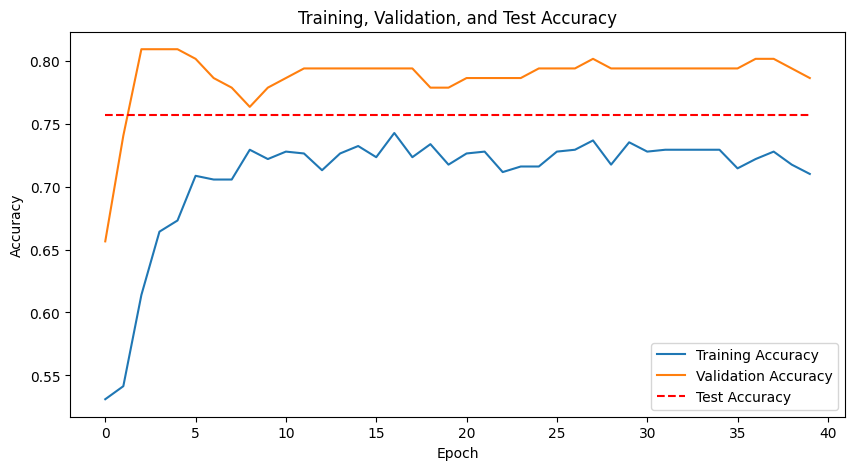

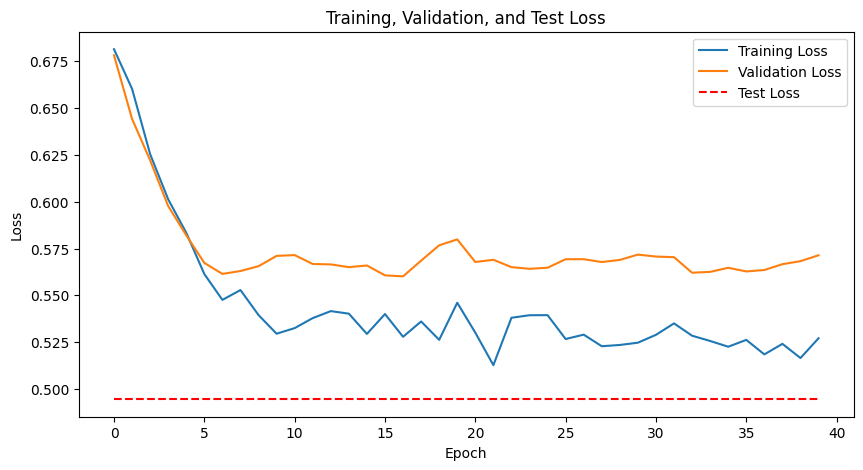

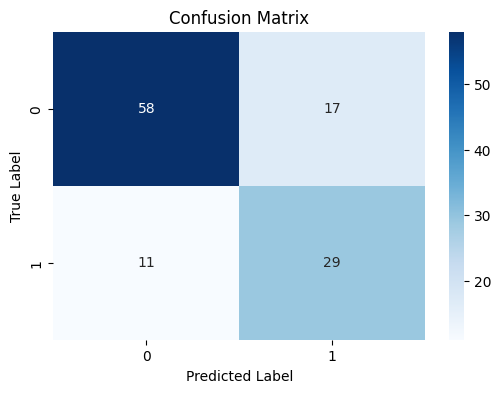

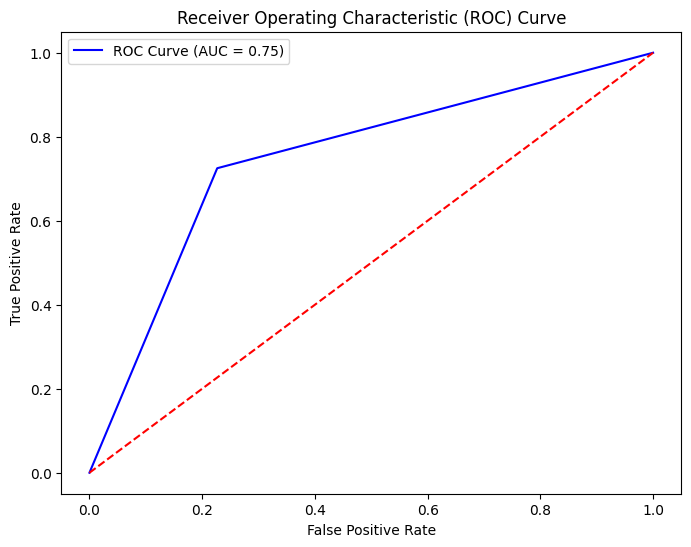

In [8]:
import torch
import time
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, roc_curve, auc


# Step 1: Define the Neural Network architecture
class CustomNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, output_size,dropout):
        super(CustomNeuralNetwork, self).__init__()
        # Input layer
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.relu1 = nn.LeakyReLU(negative_slope=0.01)
        self.dropout = nn.Dropout(dropout)
        # Hidden layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size1)
        self.relu2 = nn.LeakyReLU(negative_slope=0.01)
        self.dropout = nn.Dropout(dropout)
        # Output layer
        self.fc4 = nn.Linear(hidden_size1, output_size)
        self.sigmoid = nn.Sigmoid()  # Binary classification output

    def forward(self, x):
        output1 = self.fc1(x)
        output1 = self.relu1(output1)
        output1 = self.dropout(output1)
        output1 = self.fc2(output1)
        output2 = self.relu2(output1)
        output2 = self.dropout(output2)
        output3 = self.fc4(output2)
        output4 = self.sigmoid(output3)
        return output4

# Step 2: Initialize the model, loss function, and optimizer
input_size = 4  # Number of features
hidden_size1 = 64  # Hidden layer size
output_size = 1  # Binary classification
dropout = 0.4

# model = CustomNeuralNetwork(input_size, hidden_size1, hidden_size2, output_size,dropout)
model = CustomNeuralNetwork(input_size, hidden_size1, output_size,dropout)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 3: Train the model
epochs = 40  # Number of epochs
batch_size = 100  # Batch size

# DataLoader for batching
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

val_dataset = torch.utils.data.TensorDataset(X_val_tensor, Y_val_tensor)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

start_time = time.time()
# Save model weights
save_path = "best_weights.pth"
best_val_loss = float('inf')
best_epoch = 0
best_model_state_dict = None

for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs.squeeze(), labels)  # Compute loss

        optimizer.zero_grad()  # Clear gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        running_loss += loss.item()

        predicted_train = (outputs.squeeze() > 0.6).float()
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct_train / total_train)
    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs.squeeze(), val_labels).item()

            predicted_val = (val_outputs.squeeze() > 0.6).float()
            total_val += val_labels.size(0)
            correct_val += (predicted_val == val_labels).sum().item()
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(correct_val / total_val)

    if val_loss < best_val_loss:
        print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...")
        best_val_loss = val_loss
        best_epoch = epoch + 1
        best_model_state_dict = model.state_dict()

    print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}")

if best_model_state_dict is not None:
    torch.save(best_model_state_dict, save_path)
    print(f"Best model weights saved to {save_path} from epoch {best_epoch}")

end_time = time.time()  # Record the end time
training_time = end_time - start_time  # Calculate elapsed time
print(f"Total Training Time: {training_time:.2f} seconds")

# Step 4: Evaluate the model on the test set
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
predicted_list = []
test_list = []
test_loss = 0.0

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_outputs = model(test_inputs)
        test_list.extend(test_labels.cpu().numpy())
        predicted = (test_outputs.squeeze() > 0.6).float()
        predicted_list.extend(predicted.cpu().numpy())
        total += test_labels.size(0)
        correct += (predicted == test_labels).sum().item()
        test_loss += criterion(test_outputs.squeeze(), test_labels).item()

accuracy = correct / total * 100
print(f"Test Accuracy: {accuracy:.2f}%")
test_loss = test_loss / len(test_loader)
print(f"Test Loss: {test_loss:.4f}")
precision, recall, f1, _ = precision_recall_fscore_support(test_list, predicted_list, average='binary')

# Print the metrics
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

test_accuracies = [accuracy / 100] * epochs
test_losses = [test_loss] * epochs

# Plot Training, Validation, and Test Accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.plot(test_accuracies, label='Test Accuracy', linestyle='--', color='red')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Training, Validation, and Test Loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.plot(test_losses, label='Test Loss', linestyle='--', color='red')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Confusion Matrix
conf_matrix = confusion_matrix(test_list, predicted_list)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(test_list, predicted_list)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Part II: Optimizing NN


Hyperparameter 1 change: Changing hidden size from 64 to 128

In [9]:
input_size = 4  # Number of features
hidden_size1 =128  # Hidden layer size
output_size = 1  # Binary classification
dropout = 0.4

model = CustomNeuralNetwork(input_size, hidden_size1, output_size,dropout)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 3: Train the model
epochs = 40  # Number of epochs
batch_size = 100  # Batch size

start_time = time.time()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

start_time = time.time()

for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs.squeeze(), labels)  # Compute loss

        optimizer.zero_grad()  # Clear gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        running_loss += loss.item()

        predicted_train = (outputs.squeeze() > 0.6).float()
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct_train / total_train)
    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs.squeeze(), val_labels).item()

            predicted_val = (val_outputs.squeeze() > 0.6).float()
            total_val += val_labels.size(0)
            correct_val += (predicted_val == val_labels).sum().item()
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(correct_val / total_val)

    if val_loss < best_val_loss:
        print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...")
        best_val_loss = val_loss
        best_epoch = epoch + 1
        best_model_state_dict = model.state_dict()

    print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}")


end_time = time.time()  # Record the end time
training_time_setup_1 = end_time - start_time  # Calculate elapsed time
print(f"Total Training Time Setup #1: {training_time_setup_1:.2f} seconds")

# Step 4: Evaluate the model on the test set
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
predicted_list = []
test_list = []
test_loss = 0.0

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_outputs = model(test_inputs)
        test_list.extend(test_labels.cpu().numpy())
        predicted = (test_outputs.squeeze() > 0.6).float()
        predicted_list.extend(predicted.cpu().numpy())
        total += test_labels.size(0)
        correct += (predicted == test_labels).sum().item()
        test_loss += criterion(test_outputs.squeeze(), test_labels).item()

accuracy_setup_1 = correct / total * 100
print(f"Test Accuracy Setup #1: {accuracy_setup_1:.2f}%")


Epoch [1/40], Training Loss: 0.6823, Validation Loss: 0.6856
Epoch [2/40], Training Loss: 0.6172, Validation Loss: 0.6418
Epoch [3/40], Training Loss: 0.5724, Validation Loss: 0.5984
Epoch [4/40], Training Loss: 0.5493, Validation Loss: 0.5794
Epoch [5/40], Training Loss: 0.5465, Validation Loss: 0.5850
Epoch [6/40], Training Loss: 0.5452, Validation Loss: 0.5846
Epoch [7/40], Training Loss: 0.5364, Validation Loss: 0.5743
Epoch [8/40], Training Loss: 0.5217, Validation Loss: 0.5813
Epoch [9/40], Training Loss: 0.5311, Validation Loss: 0.5766
Epoch [10/40], Training Loss: 0.5352, Validation Loss: 0.5721
Validation loss improved from 1.1203 to 1.1181. Saving model...
Epoch [11/40], Training Loss: 0.5310, Validation Loss: 0.5591
Epoch [12/40], Training Loss: 0.5159, Validation Loss: 0.5711
Epoch [13/40], Training Loss: 0.5144, Validation Loss: 0.5689
Epoch [14/40], Training Loss: 0.5354, Validation Loss: 0.5739
Epoch [15/40], Training Loss: 0.5238, Validation Loss: 0.5799
Epoch [16/40], 

Hyperparameter Setup #2: Using setup #1 as base model, increasing the batch size

In [10]:
input_size = 4  # Number of features
hidden_size1 = 128  # Hidden layer size
output_size = 1  # Binary classification
dropout = 0.4

model = CustomNeuralNetwork(input_size, hidden_size1, output_size,dropout)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 3: Train the model
epochs = 40  # Number of epochs
batch_size = 1000  # Batch size

start_time = time.time()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

start_time = time.time()

for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs.squeeze(), labels)  # Compute loss

        optimizer.zero_grad()  # Clear gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        running_loss += loss.item()

        predicted_train = (outputs.squeeze() > 0.6).float()
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct_train / total_train)
    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs.squeeze(), val_labels).item()

            predicted_val = (val_outputs.squeeze() > 0.6).float()
            total_val += val_labels.size(0)
            correct_val += (predicted_val == val_labels).sum().item()
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(correct_val / total_val)

    if val_loss < best_val_loss:
        print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...")
        best_val_loss = val_loss
        best_epoch = epoch + 1
        best_model_state_dict = model.state_dict()

    print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}")


end_time = time.time()  # Record the end time
training_time_setup_2 = end_time - start_time  # Calculate elapsed time
print(f"Total Training Time Setup #2: {training_time_setup_2:.2f} seconds")

# Step 4: Evaluate the model on the test set
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
predicted_list = []
test_list = []
test_loss = 0.0

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_outputs = model(test_inputs)
        test_list.extend(test_labels.cpu().numpy())
        predicted = (test_outputs.squeeze() > 0.6).float()
        predicted_list.extend(predicted.cpu().numpy())
        total += test_labels.size(0)
        correct += (predicted == test_labels).sum().item()
        test_loss += criterion(test_outputs.squeeze(), test_labels).item()

accuracy_setup_2 = correct / total * 100
print(f"Test Accuracy Setup #2: {accuracy_setup_2:.2f}%")


Epoch [1/40], Training Loss: 0.6674, Validation Loss: 0.6356
Epoch [2/40], Training Loss: 0.6214, Validation Loss: 0.6077
Epoch [3/40], Training Loss: 0.5760, Validation Loss: 0.5856
Epoch [4/40], Training Loss: 0.5583, Validation Loss: 0.5752
Epoch [5/40], Training Loss: 0.5431, Validation Loss: 0.5721
Epoch [6/40], Training Loss: 0.5376, Validation Loss: 0.5800
Epoch [7/40], Training Loss: 0.5389, Validation Loss: 0.5761
Epoch [8/40], Training Loss: 0.5260, Validation Loss: 0.5856
Epoch [9/40], Training Loss: 0.5280, Validation Loss: 0.5910
Epoch [10/40], Training Loss: 0.5303, Validation Loss: 0.5830
Epoch [11/40], Training Loss: 0.5255, Validation Loss: 0.5748
Epoch [12/40], Training Loss: 0.5287, Validation Loss: 0.5729
Epoch [13/40], Training Loss: 0.5215, Validation Loss: 0.5767
Epoch [14/40], Training Loss: 0.5231, Validation Loss: 0.5653
Epoch [15/40], Training Loss: 0.5389, Validation Loss: 0.5795
Epoch [16/40], Training Loss: 0.5361, Validation Loss: 0.5664
Epoch [17/40], Tr

Hyperparameter Setup #3: Similarly using setup #2 as base and added two more hidden layers

In [11]:
class CustomNeuralNetwork(nn.Module):
  def __init__(self, input_size, hidden_size1, output_size,dropout):
    super(CustomNeuralNetwork, self).__init__()
    # Input layer
    self.fc1 = nn.Linear(input_size, hidden_size1)
    self.relu1 = nn.LeakyReLU(negative_slope=0.01)
    self.dropout = nn.Dropout(dropout)

    # Hidden layer #1
    self.fc2 = nn.Linear(hidden_size1, hidden_size1)
    self.relu2 = nn.LeakyReLU(negative_slope=0.01)
    self.dropout = nn.Dropout(dropout)

    # Hidden layer #2
    self.fc3 = nn.Linear(hidden_size1, hidden_size1)
    self.relu3 = nn.LeakyReLU(negative_slope=0.01)
    self.dropout3 = nn.Dropout(dropout) # adding the dropout layer

    # Hidden layer #3
    self.fc4 = nn.Linear(hidden_size1, hidden_size1)
    self.relu4 = nn.LeakyReLU(negative_slope=0.01)
    self.dropout4 = nn.Dropout(dropout) # adding the dropout layer

    # Output layer
    self.fc5 = nn.Linear(hidden_size1, output_size)
    self.sigmoid = nn.Sigmoid()  # Binary classification output

  def forward(self, x):
    output1 = self.fc1(x)
    output1 = self.relu1(output1)
    output1 = self.dropout(output1)

    output1 = self.fc2(output1)
    output2 = self.relu2(output1)
    output2 = self.dropout(output2)

    output2 = self.fc3(output2)
    output3 = self.relu3(output2)
    output3 = self.dropout3(output3)

    output3 = self.fc4(output3)
    output4 = self.relu4(output3)
    output4 = self.dropout4(output4)

    output4 = self.fc5(output4)
    output5 = self.sigmoid(output4)

    return output5

input_size = 4  # Number of features
hidden_size1 = 128  # Hidden layer size
output_size = 1  # Binary classification
dropout = 0.4

model = CustomNeuralNetwork(input_size, hidden_size1, output_size,dropout)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 3: Train the model
epochs = 40  # Number of epochs
batch_size = 1000  # Batch size

start_time = time.time()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

start_time = time.time()

for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
        outputs = model(inputs)  # Forward pass
        loss = criterion(outputs.squeeze(), labels)  # Compute loss

        optimizer.zero_grad()  # Clear gradients
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        running_loss += loss.item()

        predicted_train = (outputs.squeeze() > 0.6).float()
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct_train / total_train)
    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs)
            val_loss += criterion(val_outputs.squeeze(), val_labels).item()

            predicted_val = (val_outputs.squeeze() > 0.6).float()
            total_val += val_labels.size(0)
            correct_val += (predicted_val == val_labels).sum().item()
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(correct_val / total_val)

    if val_loss < best_val_loss:
        print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...")
        best_val_loss = val_loss
        best_epoch = epoch + 1
        best_model_state_dict = model.state_dict()

    print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}")


end_time = time.time()  # Record the end time
training_time_setup_3 = end_time - start_time  # Calculate elapsed time
print(f"Total Training Time Setup #3: {training_time_setup_3:.2f} seconds")

# Step 4: Evaluate the model on the test set
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
predicted_list = []
test_list = []
test_loss = 0.0

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_outputs = model(test_inputs)
        test_list.extend(test_labels.cpu().numpy())
        predicted = (test_outputs.squeeze() > 0.6).float()
        predicted_list.extend(predicted.cpu().numpy())
        total += test_labels.size(0)
        correct += (predicted == test_labels).sum().item()
        test_loss += criterion(test_outputs.squeeze(), test_labels).item()

accuracy_setup_3 = correct / total * 100
print(f"Test Accuracy Setup #3: {accuracy_setup_3:.2f}%")


Epoch [1/40], Training Loss: 0.6881, Validation Loss: 0.6832
Epoch [2/40], Training Loss: 0.6715, Validation Loss: 0.6535
Epoch [3/40], Training Loss: 0.6190, Validation Loss: 0.6078
Epoch [4/40], Training Loss: 0.5577, Validation Loss: 0.5743
Epoch [5/40], Training Loss: 0.5568, Validation Loss: 0.5657
Epoch [6/40], Training Loss: 0.5523, Validation Loss: 0.5695
Epoch [7/40], Training Loss: 0.5344, Validation Loss: 0.5674
Validation loss improved from 1.1159 to 1.1049. Saving model...
Epoch [8/40], Training Loss: 0.5353, Validation Loss: 0.5525
Validation loss improved from 1.1049 to 1.0981. Saving model...
Epoch [9/40], Training Loss: 0.5434, Validation Loss: 0.5491
Epoch [10/40], Training Loss: 0.5371, Validation Loss: 0.5528
Epoch [11/40], Training Loss: 0.5386, Validation Loss: 0.5518
Epoch [12/40], Training Loss: 0.5382, Validation Loss: 0.5675
Epoch [13/40], Training Loss: 0.5284, Validation Loss: 0.5688
Epoch [14/40], Training Loss: 0.5387, Validation Loss: 0.5618
Epoch [15/40]

### The best out of the three setups was Setup #2 changing the batch size.

Improve the model : Methods to increase training speed, accuracy, etc.

In [12]:
#choose the best accuracy model
base_model_accuracy = max(accuracy_setup_1, accuracy_setup_2, accuracy_setup_3)
print(f'Base Model accuracy is: {base_model_accuracy}')

base_model_time = max(training_time_setup_1, training_time_setup_2, training_time_setup_3)
print(f'Base Model time is: {base_model_time}')

Base Model accuracy is: 76.52173913043478
Base Model time is: 7.163672685623169


Improved Model Method #1: Early Stopping, using the Setup #2 as base model.

In [13]:
import copy

input_size = 4  # Number of features
hidden_size1 = 128  # Hidden layer size
output_size = 1  # Binary classification
dropout = 0.4

model = CustomNeuralNetwork(input_size, hidden_size1, output_size,dropout)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 3: Train the model
epochs = 40  # Number of epochs
batch_size = 1000  # Batch size

start_time = time.time()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

start_time = time.time()

# Variables used for Early Stopping
best_loss = float('inf')
counter = 0

for epoch in range(epochs):
  model.train()  # Set model to training mode
  running_loss = 0.0
  correct_train = 0
  total_train = 0
  for inputs, labels in train_loader:
    outputs = model(inputs)  # Forward pass
    loss = criterion(outputs.squeeze(), labels)  # Compute loss

    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights
    running_loss += loss.item()

    predicted_train = (outputs.squeeze() > 0.6).float()
    total_train += labels.size(0)
    correct_train += (predicted_train == labels).sum().item()

  train_losses.append(running_loss / len(train_loader))
  train_accuracies.append(correct_train / total_train)
  # Validation phase
  model.eval()  # Set model to evaluation mode
  val_loss = 0.0
  correct_val = 0
  total_val = 0
  with torch.no_grad():
    for val_inputs, val_labels in val_loader:
      val_outputs = model(val_inputs)
      val_loss += criterion(val_outputs.squeeze(), val_labels).item()

      predicted_val = (val_outputs.squeeze() > 0.6).float()
      total_val += val_labels.size(0)
      correct_val += (predicted_val == val_labels).sum().item()
  val_losses.append(val_loss / len(val_loader))
  val_accuracies.append(correct_val / total_val)

  if val_loss < best_val_loss:
    print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...")
    best_val_loss = val_loss
    best_epoch = epoch + 1
    best_model_state_dict = model.state_dict()

  print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}")

  # Early stopping method
  if val_loss < best_loss:
    best_loss = val_loss
    best_model_weights = copy.deepcopy(model.state_dict())
    counter = 10  # Reset patience counter
  else:
    counter -= 1
    if counter == 0:
        break

end_time = time.time()  # Record the end time
training_time_early_stopping = end_time - start_time  # Calculate elapsed time
print(f"Total Training Time Early Stopping: {training_time_early_stopping:.2f} seconds")

# Step 4: Evaluate the model on the test set
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
predicted_list = []
test_list = []
test_loss = 0.0

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_outputs = model(test_inputs)
        test_list.extend(test_labels.cpu().numpy())
        predicted = (test_outputs.squeeze() > 0.6).float()
        predicted_list.extend(predicted.cpu().numpy())
        total += test_labels.size(0)
        correct += (predicted == test_labels).sum().item()
        test_loss += criterion(test_outputs.squeeze(), test_labels).item()

accuracy_early_stopping = correct / total * 100
print(f"Test Accuracy Early Stopping: {accuracy_early_stopping:.2f}%")


Epoch [1/40], Training Loss: 0.6922, Validation Loss: 0.6941
Epoch [2/40], Training Loss: 0.6757, Validation Loss: 0.6661
Epoch [3/40], Training Loss: 0.6415, Validation Loss: 0.6181
Epoch [4/40], Training Loss: 0.5846, Validation Loss: 0.6007
Epoch [5/40], Training Loss: 0.5463, Validation Loss: 0.5806
Epoch [6/40], Training Loss: 0.5616, Validation Loss: 0.5823
Epoch [7/40], Training Loss: 0.5466, Validation Loss: 0.5896
Epoch [8/40], Training Loss: 0.5452, Validation Loss: 0.5628
Epoch [9/40], Training Loss: 0.5545, Validation Loss: 0.5530
Epoch [10/40], Training Loss: 0.5439, Validation Loss: 0.5756
Epoch [11/40], Training Loss: 0.5434, Validation Loss: 0.5731
Epoch [12/40], Training Loss: 0.5256, Validation Loss: 0.5661
Epoch [13/40], Training Loss: 0.5173, Validation Loss: 0.5846
Epoch [14/40], Training Loss: 0.5311, Validation Loss: 0.5851
Epoch [15/40], Training Loss: 0.5290, Validation Loss: 0.5806
Epoch [16/40], Training Loss: 0.5400, Validation Loss: 0.5554
Epoch [17/40], Tr

In [14]:
# plt.figure(figsize=(12, 5))

# plt.subplot(1, 2, 1)
# plt.plot(base_model_accuracy, label='Base Model', color='blue')
# plt.plot(accuracy_early_stopping, label='Early Stopping Model', color='orange')
# plt.title('Model Accuracy Comparison')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.grid()

# # Training time comparison
# plt.subplot(1, 2, 2)
# plt.bar(['Base Model', 'Early Stopping Model'], [base_model_time, training_time_early_stopping], color=['blue', 'orange'])
# plt.title('Training Time Comparison')
# plt.ylabel('Time (seconds)')

# plt.tight_layout()
# plt.show()

Method #2 k-fold

In [15]:
from sklearn.model_selection import KFold
from torch.utils.data import Subset

input_size = 4  # Number of features
hidden_size1 = 128  # Hidden layer size
output_size = 1  # Binary classification
dropout = 0.4

model = CustomNeuralNetwork(input_size, hidden_size1, output_size,dropout)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 3: Train the model
epochs = 40  # Number of epochs
batch_size = 1000  # Batch size

#using the dataloader for kfold
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

# val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
val_loader = torch.utils.data.DataLoader(dataset=val_dataset, batch_size=batch_size, shuffle=False)

#k-fold value
kf = KFold(n_splits=15, shuffle=True)

start_time = time.time()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

start_time = time.time()

for train_index, val_index in kf.split(train_dataset):

  train_subset = Subset(train_dataset, train_index)
  val_subset = Subset(train_dataset, val_index)

  # train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
  train_loader = torch.utils.data.DataLoader(dataset=train_subset,batch_size=batch_size, shuffle=True)

  # val_dataset = torch.utils.data.TensorDataset(X_val_tensor, y_val_tensor)
  val_loader = torch.utils.data.DataLoader(dataset=val_subset, batch_size=batch_size, shuffle=False)

  for epoch in range(epochs):
    model.train()  # Set model to training mode
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    for inputs, labels in train_loader:
      outputs = model(inputs)  # Forward pass
      loss = criterion(outputs.squeeze(), labels)  # Compute loss

      optimizer.zero_grad()  # Clear gradients
      loss.backward()  # Backpropagation
      optimizer.step()  # Update weights
      running_loss += loss.item()

      predicted_train = (outputs.squeeze() > 0.6).float()
      total_train += labels.size(0)
      correct_train += (predicted_train == labels).sum().item()

    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(correct_train / total_train)
    # Validation phase
    model.eval()  # Set model to evaluation mode
    val_loss = 0.0
    correct_val = 0
    total_val = 0
    with torch.no_grad():
      for val_inputs, val_labels in val_loader:
        val_outputs = model(val_inputs)
        val_loss += criterion(val_outputs.squeeze(), val_labels).item()

        predicted_val = (val_outputs.squeeze() > 0.6).float()
        total_val += val_labels.size(0)
        correct_val += (predicted_val == val_labels).sum().item()
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(correct_val / total_val)

    if val_loss < best_val_loss:
      print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...")
      best_val_loss = val_loss
      best_epoch = epoch + 1
      best_model_state_dict = model.state_dict()

    print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}")


end_time = time.time()  # Record the end time
training_time_kfold = end_time - start_time  # Calculate elapsed time
print(f"Total Training Time K-Fold: {training_time_kfold:.2f} seconds")

# Step 4: Evaluate the model on the test set
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
predicted_list = []
test_list = []
test_loss = 0.0

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_outputs = model(test_inputs)
        test_list.extend(test_labels.cpu().numpy())
        predicted = (test_outputs.squeeze() > 0.6).float()
        predicted_list.extend(predicted.cpu().numpy())
        total += test_labels.size(0)
        correct += (predicted == test_labels).sum().item()
        test_loss += criterion(test_outputs.squeeze(), test_labels).item()

accuracy_kfold = correct / total * 100
print(f"Test Accuracy K-Fold: {accuracy_kfold:.2f}%")


Validation loss improved from 1.0965 to 0.6796. Saving model...
Epoch [1/40], Training Loss: 0.6881, Validation Loss: 0.6796
Validation loss improved from 0.6796 to 0.6723. Saving model...
Epoch [2/40], Training Loss: 0.6854, Validation Loss: 0.6723
Validation loss improved from 0.6723 to 0.6637. Saving model...
Epoch [3/40], Training Loss: 0.6789, Validation Loss: 0.6637
Validation loss improved from 0.6637 to 0.6532. Saving model...
Epoch [4/40], Training Loss: 0.6762, Validation Loss: 0.6532
Validation loss improved from 0.6532 to 0.6415. Saving model...
Epoch [5/40], Training Loss: 0.6661, Validation Loss: 0.6415
Validation loss improved from 0.6415 to 0.6285. Saving model...
Epoch [6/40], Training Loss: 0.6587, Validation Loss: 0.6285
Validation loss improved from 0.6285 to 0.6144. Saving model...
Epoch [7/40], Training Loss: 0.6485, Validation Loss: 0.6144
Validation loss improved from 0.6144 to 0.5994. Saving model...
Epoch [8/40], Training Loss: 0.6448, Validation Loss: 0.5994


Method #3: Batch Normaization

In [17]:
class CustomNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size1, output_size,dropout):
        super(CustomNeuralNetwork, self).__init__()
        # Input layer
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.bn1 = nn.BatchNorm1d(hidden_size1)
        self.relu1 = nn.LeakyReLU(negative_slope=0.01)
        self.dropout1 = nn.Dropout(dropout)
        # Hidden layer
        self.fc2 = nn.Linear(hidden_size1, hidden_size1)
        self.bn2 = nn.BatchNorm1d(hidden_size1)
        self.relu2 = nn.LeakyReLU(negative_slope=0.01)
        self.dropout2 = nn.Dropout(dropout)
        # Output layer
        self.fc4 = nn.Linear(hidden_size1, output_size)
        self.sigmoid = nn.Sigmoid()  # Binary classification output

    def forward(self, x):
        output1 = self.bn1(self.fc1(x)) # bn1
        output1 = self.relu1(output1)
        output1 = self.dropout1(output1)
        output1 = self.bn2(self.fc2(output1))  # bn2
        output2 = self.relu2(output1)
        output2 = self.dropout2(output2)
        output3 = self.fc4(output2)
        output4 = self.sigmoid(output3)
        return output4

input_size = 4  # Number of features
hidden_size1 = 128  # Hidden layer size
output_size = 1  # Binary classification
dropout = 0.4

model = CustomNeuralNetwork(input_size, hidden_size1, output_size,dropout)
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step 3: Train the model
epochs = 40  # Number of epochs
batch_size = 1000  # Batch size

start_time = time.time()

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

start_time = time.time()

for epoch in range(epochs):
  model.train()  # Set model to training mode
  running_loss = 0.0
  correct_train = 0
  total_train = 0
  for inputs, labels in train_loader:
    outputs = model(inputs)  # Forward pass
    loss = criterion(outputs.squeeze(), labels)  # Compute loss

    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights
    running_loss += loss.item()

    predicted_train = (outputs.squeeze() > 0.6).float()
    total_train += labels.size(0)
    correct_train += (predicted_train == labels).sum().item()

  train_losses.append(running_loss / len(train_loader))
  train_accuracies.append(correct_train / total_train)
  # Validation phase
  model.eval()  # Set model to evaluation mode
  val_loss = 0.0
  correct_val = 0
  total_val = 0
  with torch.no_grad():
    for val_inputs, val_labels in val_loader:
      val_outputs = model(val_inputs)
      val_loss += criterion(val_outputs.squeeze(), val_labels).item()

      predicted_val = (val_outputs.squeeze() > 0.6).float()
      total_val += val_labels.size(0)
      correct_val += (predicted_val == val_labels).sum().item()
  val_losses.append(val_loss / len(val_loader))
  val_accuracies.append(correct_val / total_val)

  if val_loss < best_val_loss:
    print(f"Validation loss improved from {best_val_loss:.4f} to {val_loss:.4f}. Saving model...")
    best_val_loss = val_loss
    best_epoch = epoch + 1
    best_model_state_dict = model.state_dict()

  print(f"Epoch [{epoch+1}/{epochs}], Training Loss: {running_loss/len(train_loader):.4f}, Validation Loss: {val_loss/len(val_loader):.4f}")


end_time = time.time()  # Record the end time
training_time_batch_norm = end_time - start_time  # Calculate elapsed time
print(f"Total Training Time Batch Normalization: {training_time_batch_norm:.2f} seconds")

# Step 4: Evaluate the model on the test set
test_dataset = torch.utils.data.TensorDataset(X_test_tensor, Y_test_tensor)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

model.eval()
correct = 0
total = 0
predicted_list = []
test_list = []
test_loss = 0.0

with torch.no_grad():
    for test_inputs, test_labels in test_loader:
        test_outputs = model(test_inputs)
        test_list.extend(test_labels.cpu().numpy())
        predicted = (test_outputs.squeeze() > 0.6).float()
        predicted_list.extend(predicted.cpu().numpy())
        total += test_labels.size(0)
        correct += (predicted == test_labels).sum().item()
        test_loss += criterion(test_outputs.squeeze(), test_labels).item()

accuracy_batch_norm = correct / total * 100
print(f"Test Accuracy Batch Normalization: {accuracy_batch_norm:.2f}%")


Epoch [1/40], Training Loss: 0.7416, Validation Loss: 0.6934
Epoch [2/40], Training Loss: 0.6952, Validation Loss: 0.6820
Epoch [3/40], Training Loss: 0.6592, Validation Loss: 0.6699
Epoch [4/40], Training Loss: 0.6069, Validation Loss: 0.6572
Epoch [5/40], Training Loss: 0.6026, Validation Loss: 0.6441
Epoch [6/40], Training Loss: 0.5749, Validation Loss: 0.6312
Epoch [7/40], Training Loss: 0.5584, Validation Loss: 0.6189
Epoch [8/40], Training Loss: 0.5611, Validation Loss: 0.6075
Epoch [9/40], Training Loss: 0.5483, Validation Loss: 0.5978
Epoch [10/40], Training Loss: 0.5449, Validation Loss: 0.5895
Epoch [11/40], Training Loss: 0.5469, Validation Loss: 0.5824
Epoch [12/40], Training Loss: 0.5426, Validation Loss: 0.5768
Epoch [13/40], Training Loss: 0.5424, Validation Loss: 0.5725
Epoch [14/40], Training Loss: 0.5338, Validation Loss: 0.5696
Epoch [15/40], Training Loss: 0.5327, Validation Loss: 0.5678
Epoch [16/40], Training Loss: 0.5425, Validation Loss: 0.5669
Epoch [17/40], Tr

Method #4: Learning Rate Scheduler

In [ ]:
import torch.optim.lr_scheduler as lr_scheduler

